In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
import os

# Suppress warnings 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Verify GPU detection
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

2025-03-16 07:56:32.858121: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 07:56:32.964398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742091093.011301   13537 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742091093.022562   13537 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742091093.088073   13537 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Update paths for WSL 
train_dir = "/mnt/c/Users/madan/datasets/cats_vs_dogs/train"
val_dir = "/mnt/c/Users/madan/datasets/cats_vs_dogs/validation"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.1
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,  # Increase batch size for GPU
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Load pre-trained MobileNetV2 (GPU-optimized)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)
base_model.trainable = False  # Freeze layers

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


try:
    print(model.summary())
except NameError:
    print("ERROR: Model not defined! Check previous code.")

I0000 00:00:1742091106.983062   13537 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1422 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [4]:
# Clear any previous models from memory
tf.keras.backend.clear_session()

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [5]:
# Add during training
tf.debugging.set_log_device_placement(True)

In [6]:
# Train with GPU
history = model.fit(
    train_generator,
    epochs=10,  # Start with 10 epochs
    validation_data=val_generator,
    verbose=1  # Show progress bar
)

/home/madantimilsina/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1742091150.332431   13690 service.cc:152] XLA service 0x7f75f0052700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742091150.332575   13690 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2025-03-16 07:57:30.517842: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742091151.939525   13690 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-16 07:57:40.801259: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng34{k2=0,k4=2,k5=1,k6=0,k7=0} for conv %cudnn-conv.65 = (f32[64,24,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,144,32,32]{3,2,1,0} %bitcast.5412, f32[24,144,1,1]{3,2,1,0} %bitcast.5419), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="sequential_1/m

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:59:47 23s/step - accuracy: 0.4844 - loss: 0.8764

I0000 00:00:1742091168.472805   13690 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9187 - loss: 0.1842

/home/madantimilsina/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 692s 2s/step - accuracy: 0.9188 - loss: 0.1840 - val_accuracy: 0.9522 - val_loss: 0.1100
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 212s 675ms/step - accuracy: 0.9604 - loss: 0.0978 - val_accuracy: 0.9578 - val_loss: 0.1060
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 223s 711ms/step - accuracy: 0.9659 - loss: 0.0891 - val_accuracy: 0.9568 - val_loss: 0.0995
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 633ms/step - accuracy: 0.9672 - loss: 0.0817 - val_accuracy: 0.9650 - val_loss: 0.0908
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 651ms/step - accuracy: 0.9685 - loss: 0.0781 - val_accuracy: 0.9572 - val_loss: 0.0974
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 651ms/step - accuracy: 0.9719 - loss: 0.0709 - val_accuracy: 0.9654 - val_loss: 0.0890
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 649ms/step - accuracy: 0.9729 - loss: 0.0663 - val_accuracy: 0.9586 - val_loss: 0.1069
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 642ms/step - accuracy: 0.9772 - loss: 0.0616 

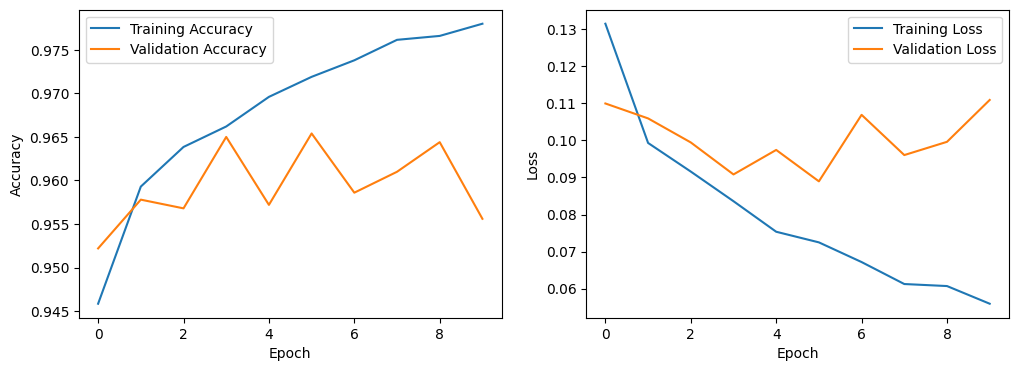

In [7]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Save the model
model.save('cats_vs_dogs_gpu.h5')

79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 327ms/step - accuracy: 0.9566 - loss: 0.1067


Validation Accuracy: 95.56%


2025-03-16 12:43:33.316079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 12:43:33.922997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742108314.115185     533 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742108314.161862     533 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742108314.561156     533 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

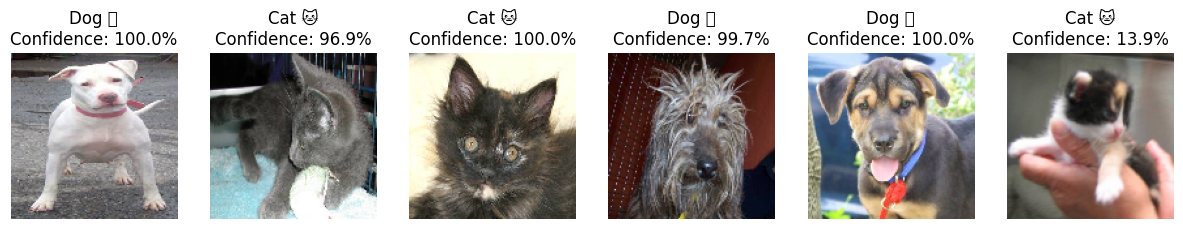

In [1]:
# Cell 9: Model Testing and Evaluation
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Load Saved Model
model = load_model('cats_vs_dogs_gpu.h5') 

# 2. Prediction Function
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)[0][0]
    return "Dog 🐶" if prediction > 0.5 else "Cat 🐱", abs(prediction - 0.5) * 200  # Confidence %

# 3. Test with Sample Images
test_images = [
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/31.jpg",  
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/100.jpg",
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/468.jpg",
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/196.jpg",
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/695.jpg",
    "/mnt/c/Users/madan/datasets/cats_vs_dogs/test1/776.jpg"
]

# 4. Visualize Predictions
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(test_images):
    plt.subplot(1, len(test_images), i+1)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.imshow(img)
    prediction, confidence = predict_image(img_path)
    plt.title(f"{prediction}\nConfidence: {confidence:.1f}%")
    plt.axis('off')
plt.show()